In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.read_csv('advertising.csv')

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data Cleaning

In [7]:
#Checking for null value

In [8]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

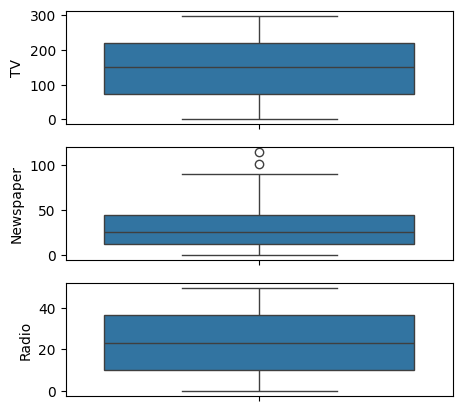

In [9]:
fig, axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(advertising['TV'], ax=axs[0])
plt1 = sns.boxplot(advertising['Newspaper'], ax=axs[1])
plt1 = sns.boxplot(advertising['Radio'], ax=axs[2])

EDA

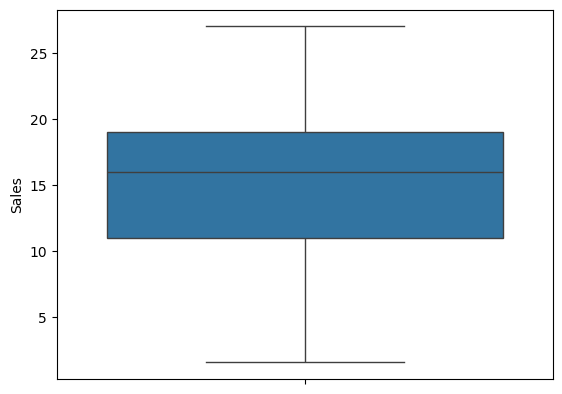

In [10]:
sns.boxplot(advertising['Sales'])
plt.show()

In [11]:
#using scatter plot to find out the relationship between sales and the factors for advertising

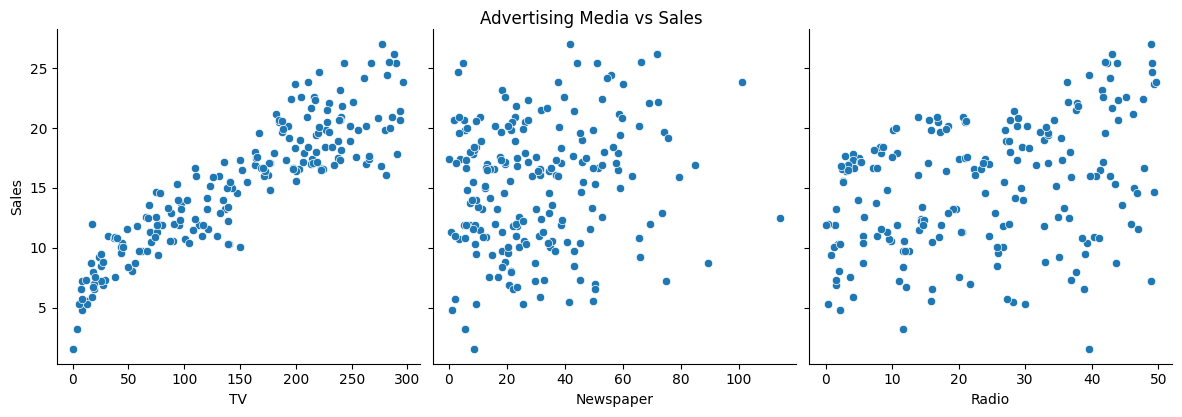

In [12]:

sns.pairplot(advertising, 
             x_vars=['TV', 'Newspaper', 'Radio'], 
             y_vars=['Sales'], 
             height=4, 
             aspect=1, 
             kind='scatter')

plt.suptitle('Advertising Media vs Sales', y=1.02)
plt.show()


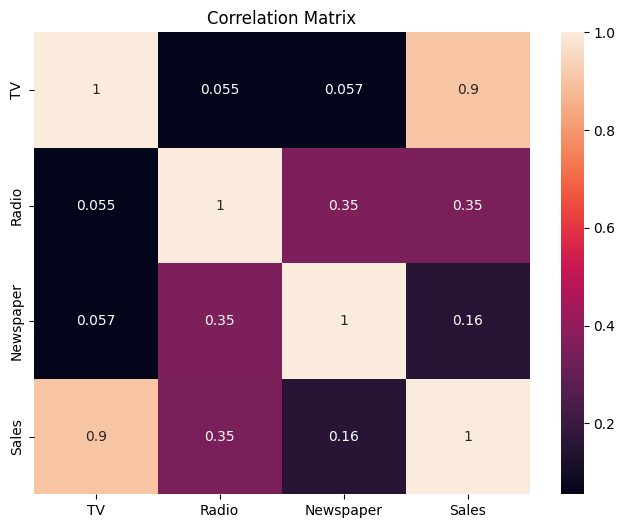

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(advertising.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

#Model Building

In [14]:
X = advertising ['TV']
y = advertising ['Sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [18]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 117.3 kB/s eta 0:00:0000:0200:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [19]:
import statsmodels.api as sm

In [20]:
X_train_sm = sm.add_constant (X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.52e-52
Time:                        15:01:30   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

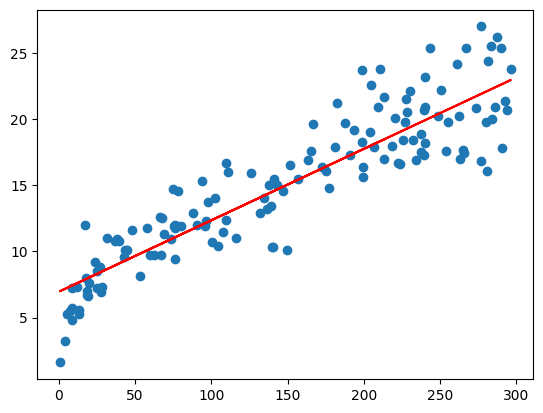

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()  

Model Evaluation

In [24]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/var/folders/ck/blbpk2hn1tzbshc_gl78ghh00000gn/T/ipykernel_1048/3003513444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


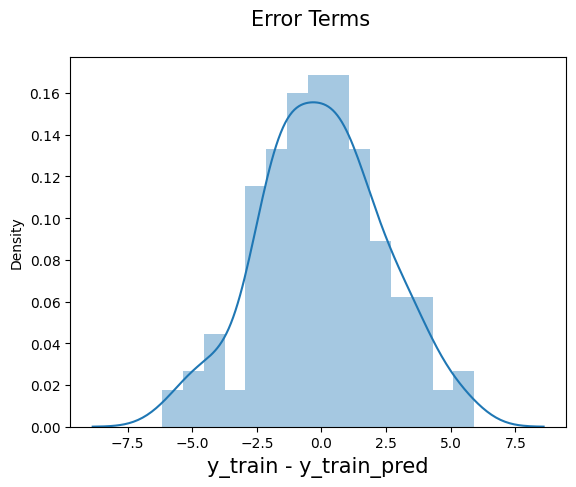

In [25]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

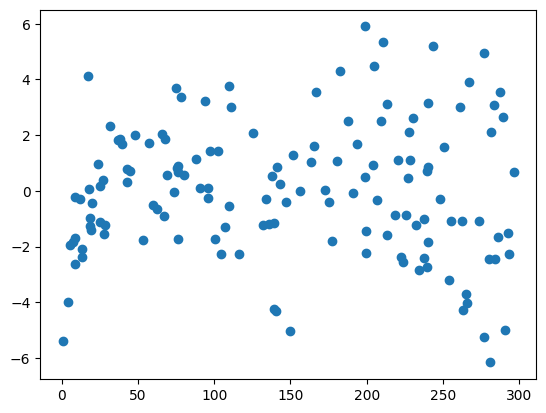

In [26]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
#Prediction

In [27]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [28]:
y_pred.head()


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2.0192960089662333)

In [31]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245656

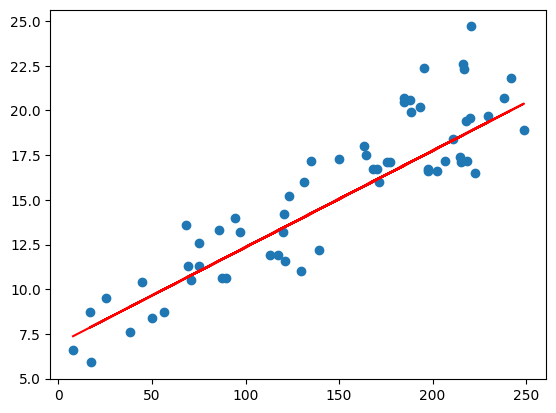

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()